In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, absolute
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

from sklearn.linear_model import (LinearRegression,
                                  Ridge, 
                                  Lasso)                                 
from sklearn.model_selection import (cross_val_score, 
                                     KFold, 
                                     train_test_split)
from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler, 
                                   PolynomialFeatures, 
                                   scale)
from ISLP.models import (ModelSpec,
                         summarize,
                         poly)



In [17]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,january,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0,3,13,16
1,spring,0,january,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0,8,32,40
2,spring,0,january,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0,5,27,32
3,spring,0,january,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0,3,10,13
4,spring,0,january,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp

#### OLS Regression

In [19]:
bike['workingday'] = bike.workingday.factorize()[0]
bike['weathersit'] = bike.weathersit.factorize()[0]
bike['season'] = bike.season.factorize()[0]
bike['mnth'] = bike.mnth.factorize()[0]
bike['weekday'] = bike.weekday.factorize()[0]
bike['holiday'] = bike.holiday.factorize()[0]


est = smf.ols('cnt ~ hr + workingday + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:04:57   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr             9.0494      0.170     53.100      0.000       8.715       9.383
workingday     3.7938      2.512      1.511      0.131      -1.129       8.717
temp         336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

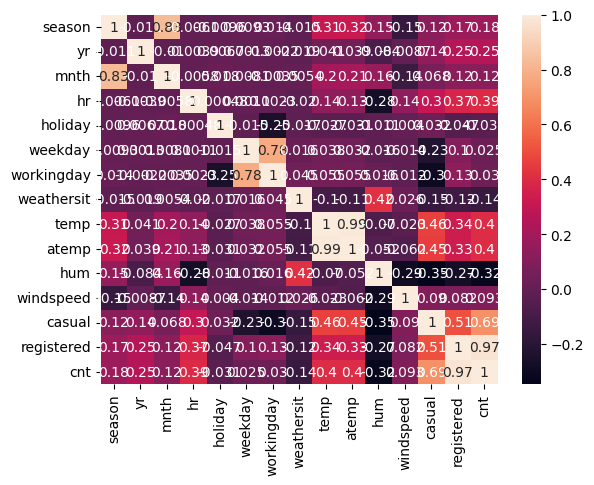

In [20]:
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

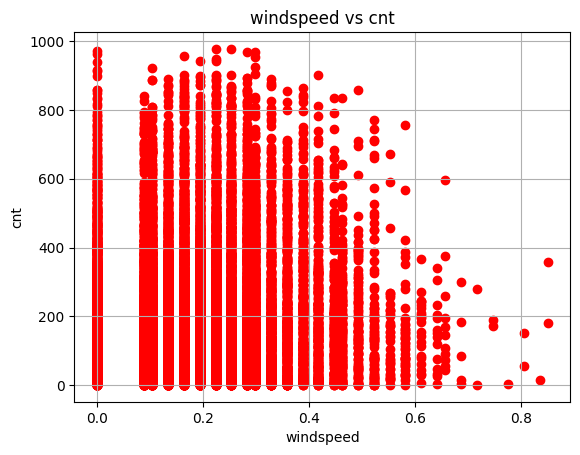

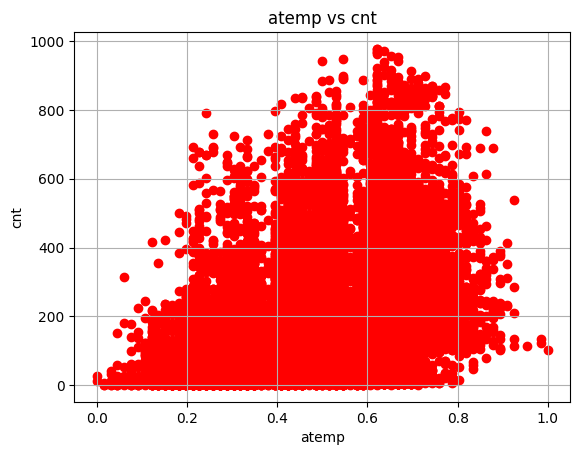

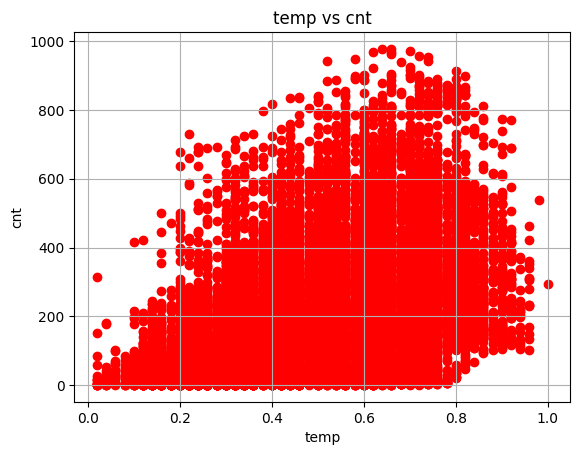

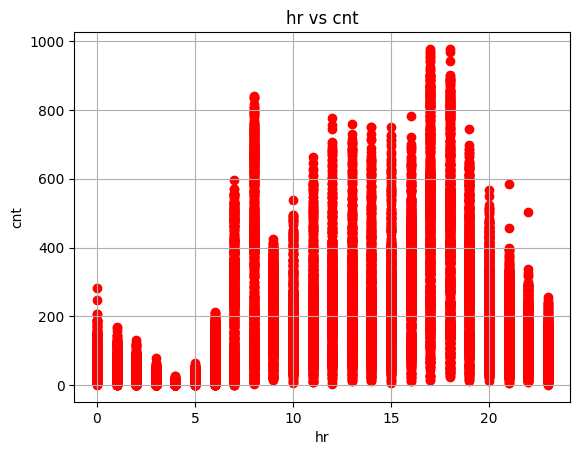

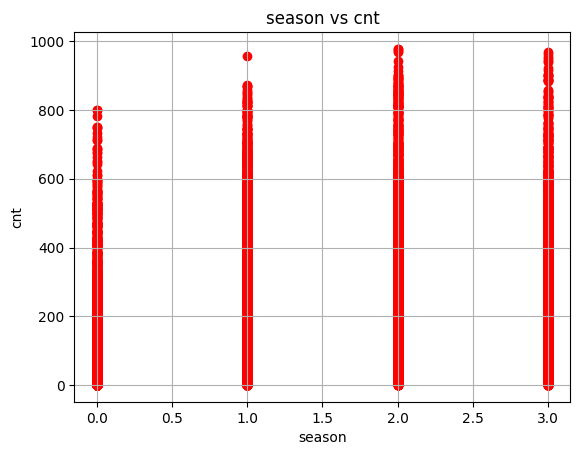

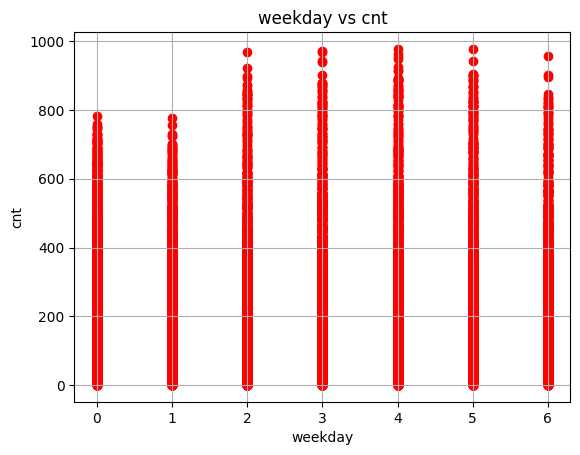

In [21]:
plt.scatter(bike['windspeed'], bike['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['atemp'], bike['cnt'], color='red')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['temp'], bike['cnt'], color='red')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['hr'], bike['cnt'], color='red')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['season'], bike['cnt'], color='red')
plt.title('season vs cnt')
plt.xlabel('season')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['weekday'], bike['cnt'], color='red')
plt.title('weekday vs cnt')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

#### Cross-Validation

In [22]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.2987103602761939

In [23]:
x = bike[['windspeed','hr','temp','season','weekday','holiday', 'workingday','weathersit', 'hum', 'yr']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.3837558064428431

In [24]:
bike_df_final = pd.read_csv("Bike Sharing Dataset.csv")
X = bike_df_final.drop(['instant', 'cnt', 'registered', 'casual', 'dteday'], axis=1)
X.head()
X_encoded = pd.get_dummies(X)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     17379 non-null  int64  
 1   hr                     17379 non-null  int64  
 2   temp                   17379 non-null  float64
 3   atemp                  17379 non-null  float64
 4   hum                    17379 non-null  float64
 5   windspeed              17379 non-null  float64
 6   season_autumn          17379 non-null  uint8  
 7   season_spring          17379 non-null  uint8  
 8   season_summer          17379 non-null  uint8  
 9   season_winter          17379 non-null  uint8  
 10  mnth_april             17379 non-null  uint8  
 11  mnth_august            17379 non-null  uint8  
 12  mnth_december          17379 non-null  uint8  
 13  mnth_february          17379 non-null  uint8  
 14  mnth_january           17379 non-null  uint8  
 15  mn

#### Linear Regression

In [25]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
feature_names = X_train.columns
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

print(f"Mean squared error is {mean_squared_error(y_test, y_pred)}")

print(f"Root mean squared is {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2 Score: 0.4085837949485135
Mean squared error is 18727.437404001554
Root mean squared is 136.8482276246264


#### PCA

X_train_pca shape: (13903, 20)
X_test_pca shape: (3476, 20)
X train shape:  (13903, 37)
X test shape:  (3476, 37)
Explained Variance Ratio: [0.10879597 0.08589582 0.0661669  0.06221031 0.05802631 0.05466345
 0.03613398 0.03430276 0.03212476 0.03168696 0.03150665 0.03134872
 0.0310166  0.02998625 0.02954614 0.02941608 0.02925727 0.02894849
 0.02887805 0.02858233]
Cumulative Variance Ratio: [0.10879597 0.19469179 0.26085869 0.323069   0.38109531 0.43575876
 0.47189274 0.50619549 0.53832025 0.5700072  0.60151385 0.63286257
 0.66387917 0.69386542 0.72341157 0.75282765 0.78208492 0.81103341
 0.83991146 0.86849379]


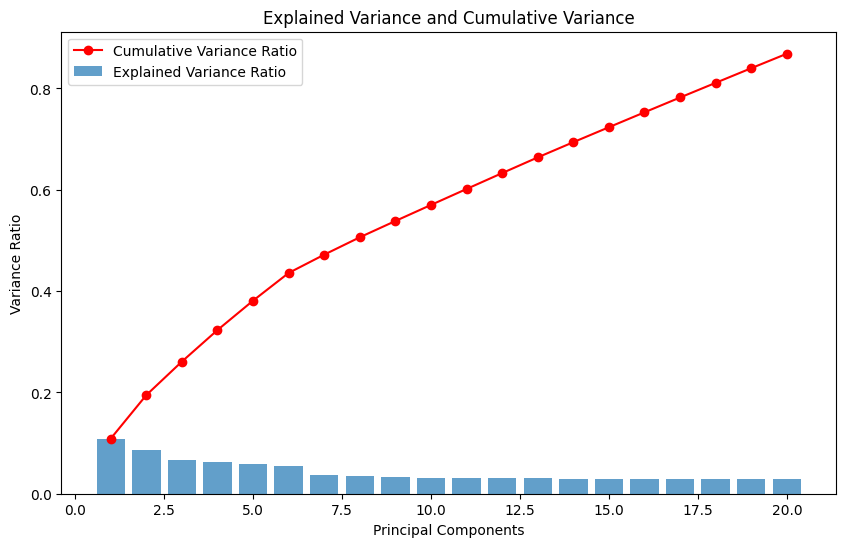

Mean Squeared Error: 20079.6977226283
R2 Score:  0.3658791446201638


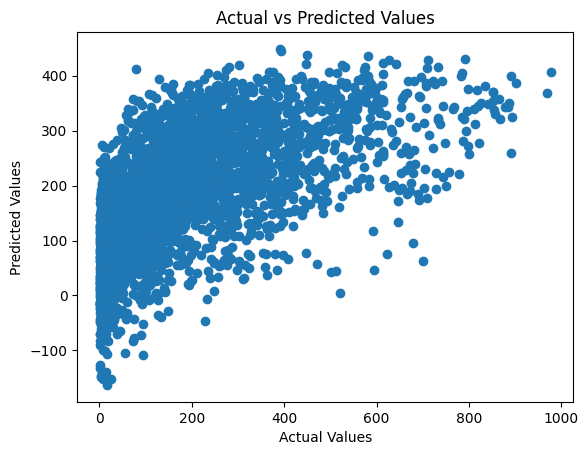

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
mms = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)

explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)

cumulative_variance = explained_variance.cumsum()
print("Cumulative Variance Ratio:", cumulative_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance Ratio', alpha=0.7)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, label='Cumulative Variance Ratio', marker='o', color='r')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.title('Explained Variance and Cumulative Variance')
plt.show()


# Linear regression after PCA

model = LinearRegression()

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squeared Error: {mse}')
print(f'R2 Score: ', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print(type(X_train))
print(type(X_test))

#### Forward Stepwise Selection

In [27]:
est = LinearRegression()
selector = SequentialFeatureSelector(est, direction='forward', scoring='neg_mean_squared_error', n_features_to_select=10, cv=10)
selector = selector.fit(X_train, y_train)

selected_features = np.where(selector.support_)[0]
selected_feature_names = feature_names[selected_features]
print("Selected features:", selected_feature_names)

fwd_model = LinearRegression().fit(X_train[:, selected_features], y_train)

y_pred = fwd_model.predict(X_test[:, selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Forward MSE:", mse)
print("Forward R2: ", r2)

Selected features: Index(['yr', 'hr', 'temp', 'hum', 'season_winter', 'mnth_august', 'mnth_july',
       'mnth_june', 'holiday_no', 'weathersit_light rain'],
      dtype='object')
Forward MSE: 18854.946517014265
Forward R2:  0.40455703175071767


#### Backward Stepwise Selection

In [28]:
est = LinearRegression()
selector = SequentialFeatureSelector(est, direction='backward', scoring='neg_mean_squared_error', n_features_to_select=10, cv=10)
selector = selector.fit(X_train, y_train)

selected_features = np.where(selector.support_)[0]
selected_feature_names = feature_names[selected_features]
print("Selected features:", selected_feature_names)

fwd_model = LinearRegression().fit(X_train[:, selected_features], y_train)

y_pred = fwd_model.predict(X_test[:, selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Backward MSE:", mse)
print("Backward R2: ", r2)

Selected features: Index(['yr', 'hr', 'temp', 'hum', 'season_autumn', 'season_spring',
       'mnth_december', 'mnth_october', 'mnth_september',
       'weathersit_light rain'],
      dtype='object')
Backward MSE: 19051.387598155867
Backward R2:  0.39835338326327685


Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

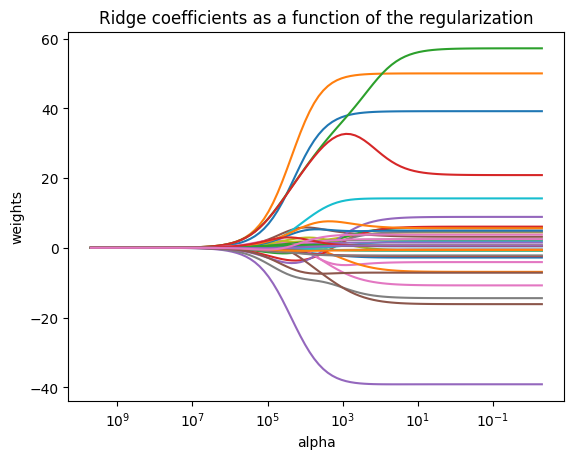

In [29]:
alphas = 10**np.linspace(10, -2, 100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_encoded), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

In [30]:

ridge = Ridge(alpha=X_train.shape[1]*.1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

18727.162122946764
0.40859248837907935


#### Lasso Using Sklearn

Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

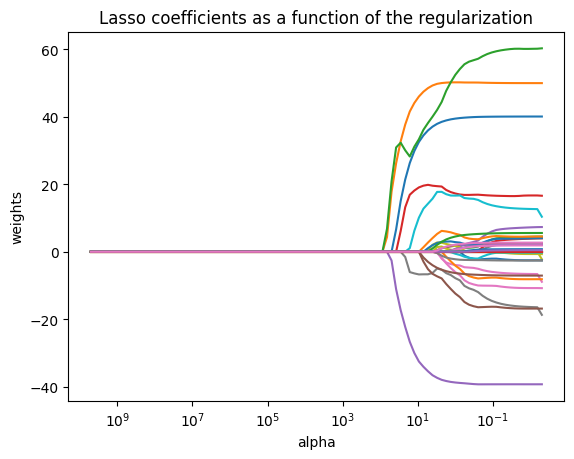

In [31]:
lasso = Lasso(max_iter=1000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')

In [32]:
lasso = Lasso(alpha=X_train.shape[1]/1000)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

18730.9134184286
0.40847402172023894


In [33]:
bike_df_final = pd.read_csv('BikeSharingDatasetFinal.csv', usecols=[3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [34]:
bike_df_final['mnth_cat'] = bike_df_final.mnth_cat.factorize()[0]
bike_df_final['weekday_cat'] = bike_df_final.weekday_cat.factorize()[0]
bike_df_final['weathersit_cat'] = bike_df_final.weathersit_cat.factorize()[0]
bike_df_final['season_cat'] = bike_df_final.season_cat.factorize()[0]
bike_df_final.tail()

,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_cat,season_cat,mnth_cat,weekday_cat,holiday_no,holiday_yes,workingday_no,workingday_yes
284696,1,20,0.26,0.2576,0.6,0.1642,8,81,89,1,0,11,2,1,0,0,0
284697,1,20,0.26,0.2576,0.6,0.1642,8,81,89,1,0,11,2,1,0,0,0
284698,1,20,0.26,0.2576,0.6,0.1642,8,81,89,1,0,11,2,1,0,0,0
284699,1,20,0.26,0.2576,0.6,0.1642,8,81,89,1,0,11,2,1,0,0,0
284700,1,20,0.26,0.2576,0.6,0.1642,8,81,89,1,0,11,2,1,0,0,0


#### Polynomial

In [35]:

y_poly1 = bike_df_final['cnt']


x_poly1 = ModelSpec([poly('hr', degree=2),
                     poly('workingday_yes', degree=2),
                     poly('temp', degree=2),
                     'workingday_yes', 
                     'temp',
                     'hr'
                      ]).fit_transform(bike_df_final)

poly1model = sm.OLS(y_poly1, x_poly1)
results_poly1 = poly1model.fit()
summarize(results_poly1)

print(results_poly1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 3.863e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:06:44   Log-Likelihood:            -1.8163e+06
No. Observations:              284701   AIC:                         3.633e+06
Df Residuals:                  284695   BIC:                         3.633e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
interc

In [36]:
# poly model - 2 
# cnt as dependent .
# 'windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat'
# use sklearn PolynomialFeatures.



x_poly2 = bike_df_final[['holiday_yes', 'holiday_no', 'windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat', 'yr']]
y_poly2 = bike_df_final['cnt']

poly2features = PolynomialFeatures(degree=2)
xfit_poly2 = poly2features.fit_transform(x_poly2)

poly2model = LinearRegression()
poly2model.fit(xfit_poly2, y_poly2)


cv = KFold(n_splits=50, shuffle=True)

poly2scores = cross_val_score(poly2model, x_poly2, y_poly2, scoring='r2', cv=cv, n_jobs=-1)
print(mean(absolute(poly2scores)))

print("Intercept:  ",poly2model.intercept_)
print("Coefficient:  ", poly2model.coef_)
print("Score:  ", poly2model.score(xfit_poly2, y_poly2))

0.36670884229245215
Intercept:   -93.98381350841976
Coefficient:   [ 5.34704410e-13 -1.92441441e+00  1.92441441e+00 -1.04669275e+02
  2.17001736e+01  1.34766769e+02  3.13694342e+00  3.01396872e+00
 -5.88848232e+00 -5.88848232e+00  2.68420750e+01 -1.82515828e+01
 -1.92441441e+00  6.28830321e-13 -4.38623671e+01  1.04056117e+01
  5.63840933e+01  5.92188746e+00  5.87760490e+00 -1.92441441e+00
 -1.92441441e+00  2.68764557e+01 -1.96153549e+01  1.92441441e+00
 -6.08069077e+01  1.12945619e+01  7.83826762e+01 -2.78494404e+00
 -2.86363617e+00 -3.96406791e+00 -3.96406791e+00 -3.43806148e-02
  1.36377208e+00 -1.93147946e+02  6.17360182e+00  2.03293461e+02
  2.24678883e+01  9.61815161e+00  4.38503435e+01  4.38503435e+01
 -4.63159091e+01  8.39470817e+01 -1.55405568e+00  2.06074990e+01
  8.23596711e-01 -1.69429056e-01 -1.19200142e+00 -1.19200142e+00
 -1.70350097e+00  4.04985055e+00 -3.62476345e+02 -2.24330557e+00
  5.94981723e+00  7.35775530e+01  7.35775530e+01 -8.85021394e+00
  1.11838500e+02  1.757

In [37]:
# poly model - 3
# cnt as dependent .
# windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat'
# use sklearn PolynomialFeatures.

x_poly3 = bike_df_final[['holiday_yes', 'holiday_no', 'windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat', 'yr']]
y_poly3 = bike_df_final['cnt']


poly3features = PolynomialFeatures(degree=3)
xfit_poly3 = poly3features.fit_transform(x_poly3)

poly3model = LinearRegression()
poly3model.fit(xfit_poly3, y_poly3)


cv = KFold(n_splits=50, shuffle=True)

poly3scores = cross_val_score(poly3model, x_poly3, y_poly3, scoring='r2', cv=cv, n_jobs=-1)

print(mean(absolute(poly3scores)))

print("Intercept:  ",poly3model.intercept_)
print("Coefficient:  ", poly3model.coef_)
print("Score:  ", poly3model.score(xfit_poly3, y_poly3))

0.3667139156981636
Intercept:   99.22101663990456
Coefficient:   [-5.38627175e-10  1.74718097e+01 -1.74718097e+01  2.07522993e+02
 -1.26536862e+01 -5.69854494e+02  1.76017981e+01  1.64703855e+01
  7.15616796e+00  7.15616796e+00  3.45455762e+01 -5.80560481e+00
  1.74718097e+01 -5.26458599e-10  1.32630068e+02 -4.23212448e+00
 -2.94107552e+02 -1.88939892e+00 -1.01309226e+01  1.74718097e+01
  1.74718097e+01 -6.29803626e+00 -1.29312394e+01 -1.74718097e+01
  7.48929257e+01 -8.42156167e+00 -2.75746942e+02  1.94911971e+01
  2.66013081e+01 -1.03156417e+01 -1.03156417e+01  4.08436124e+01
  7.12563462e+00 -4.02830535e+01 -2.67909020e+01 -5.32231318e+02
  7.92371208e+01 -4.78581047e+01 -5.53438467e+00 -5.53438467e+00
  4.64185148e+01 -8.13197003e+01  3.68877721e+00 -6.79082474e+00
  4.69013997e+00  1.58611275e+00  8.09309194e-02  8.09309193e-02
 -5.15419374e+00  7.29310461e+00  2.61771724e+03 -4.19976565e+01
 -3.52274699e+01 -4.23367743e+01 -4.23367743e+01 -5.85229048e+01
  8.48254483e+01 -1.41128

In [38]:
lasso_poly = Lasso(alpha=.001)
lasso_poly.fit(xfit_poly3, y_poly3)

c:\ProgramData\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+09, tolerance: 9.731e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [39]:
lasso_poly_scores = cross_val_score(lasso_poly, x_poly3, y_poly3, scoring='r2', cv=cv, n_jobs=-1)
print(mean(absolute(lasso_poly_scores)))

print("Intercept:  ",lasso_poly.intercept_)
print("Coefficient:  ", lasso_poly.coef_)
print("Score:  ", lasso_poly.score(xfit_poly3, y_poly3))

0.36665081969605895
Intercept:   -108.06070251656132
Coefficient:   [ 0.00000000e+00  2.26999875e+01 -2.44851791e-14  3.80908397e+01
  3.01579745e+01  2.46596643e+02  3.60339963e+01  3.70227699e-01
  5.89026554e+00  1.99683462e-13 -3.56700952e+01  8.50116716e+01
  1.67796777e+00  0.00000000e+00  3.69424234e+01 -6.44935554e+00
 -2.66088992e+01  7.55211188e+00  2.09688974e+01  5.16455391e+00
  0.00000000e+00 -0.00000000e+00 -2.64697481e+00 -3.34274316e+00
 -6.07915553e+01 -7.63073468e-02  7.14983178e+00  1.65655205e+00
  4.26891208e-01 -1.69058458e+00 -0.00000000e+00 -0.00000000e+00
  5.16301323e+00 -0.00000000e+00 -2.75429662e+01 -9.27377117e+00
  1.09942465e+02  1.05299139e+01  3.00948555e+01  1.07016118e-13
  7.65391459e+01  1.81613056e+01  1.99515332e+00 -2.31163160e+01
  1.76089700e+00 -3.72203399e+00 -1.89568257e+01 -4.71671677e-15
 -6.54770019e+00 -1.07830873e+00  1.02737091e+03 -3.88058309e+01
 -6.39701735e+01 -7.59084105e+00 -9.65406183e-14 -7.11421269e+01
  7.10037326e+01 -1.86

In [40]:
# poly model - 4
# cnt as dependent .
# windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat'
# use sklearn PolynomialFeatures.

x_poly4 = bike_df_final[['holiday_yes', 'holiday_no', 'windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat', 'yr']]
y_poly4 = bike_df_final['cnt']

poly4features = PolynomialFeatures(degree=4)
xfit_poly4 = poly4features.fit_transform(x_poly4)

poly4model = LinearRegression()
poly4model.fit(xfit_poly4, y_poly4)


cv = KFold(n_splits=50, shuffle=True)

poly4scores = cross_val_score(poly4model, x_poly4, y_poly4, scoring='r2', cv=cv, n_jobs=-1)

print(mean(absolute(poly4scores)))

print("Intercept:  ",poly4model.intercept_)
print("Coefficient:  ", poly4model.coef_)
print("Score:  ", poly4model.score(xfit_poly4, y_poly4))

0.3667136116804507
Intercept:   1106531005.0884485
Coefficient:   [-2.68512308e-07  3.70400373e+09 -1.38926592e+09 ... -5.76379225e+05
  2.04567007e+05 -2.14643586e+07]
Score:   0.6662157073150858
